In [93]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler



In [24]:
df = pd.read_csv('Passengers.csv', parse_dates=['Month'], index_col='Month')

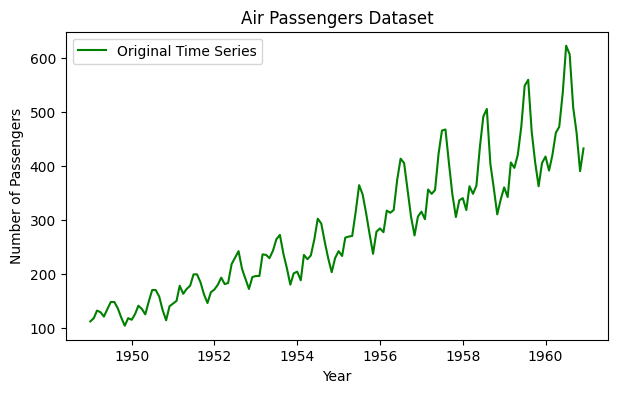

In [25]:
plt.figure(figsize=(7, 4))
plt.plot(df.index, df['#Passengers'], label='Original Time Series', color='green')
plt.title('Air Passengers Dataset')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [76]:

def normalize_data(data):
    mean = data.mean()
    std = data.std()
    return (data - mean) / std, mean, std

def denormalize_data(data, mean, std):
    return data * std + mean


def reshape_for_lstm(data):
    return data.reshape((data.shape[0], 1, 1))

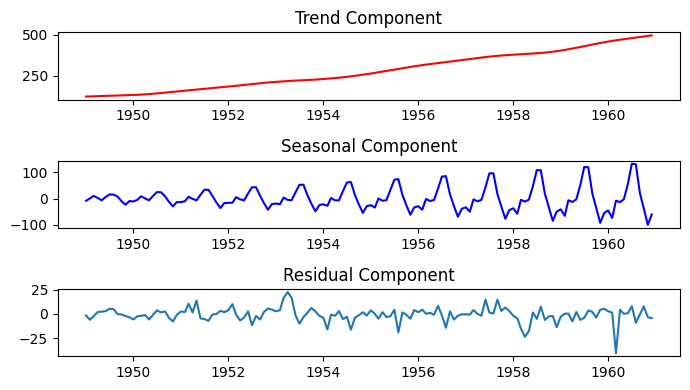

In [26]:
stl = STL(df['#Passengers'], seasonal=13, robust=True) 
result = stl.fit()

# Plot the decomposition components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 4))

ax1.plot(df.index, result.trend, label='Trend', color='red')
ax1.set_title('Trend Component')
ax2.plot(df.index, result.seasonal, label='Seasonal', color='blue')
ax2.set_title('Seasonal Component')
ax3.plot(df.index, result.resid, label='Residual')
ax3.set_title('Residual Component')
plt.tight_layout()
plt.show()

Epoch 1/20
100/100 [==============================] - 2s 3ms/step - loss: 0.1290
Epoch 2/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0807
Epoch 3/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0844
Epoch 4/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0794
Epoch 5/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0744
Epoch 6/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0808
Epoch 7/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0648
Epoch 8/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0763
Epoch 9/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0756
Epoch 10/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0698
Epoch 11/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0700
Epoch 12/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 13/20
100/100 [====

ValueError: x and y must have same first dimension, but have shapes (143,) and (99,)

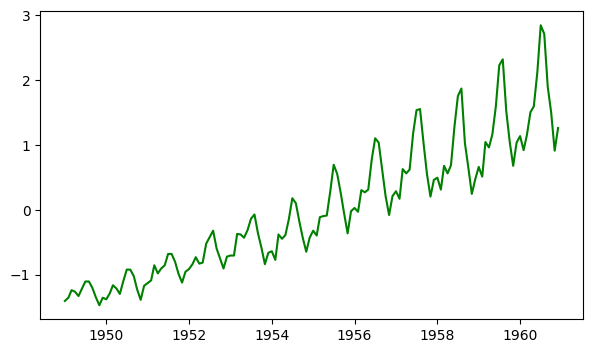

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

pred_train = linear_model.predict(X_train)

residual_train = y_train - pred_train

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Sequence length for LSTM
seq_length = 1
X_lstm_train, y_lstm_train = create_sequences(residual_train, seq_length)

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='tanh', input_shape=(1, 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, residual_train, epochs=20, batch_size=1, verbose=1)

linear_forecast_truncated = pred_train[-seq_length:].flatten()

lstm_forecast = lstm_model.predict(X_lstm_train).flatten()

final_forecast = linear_forecast_truncated + lstm_forecast

final_forecast_original_scale = scaler.inverse_transform(final_forecast.reshape(-1, 1)).flatten()

# Performance Evaluation (RMSE)
rmse_train = np.sqrt(mean_squared_error(y_train[seq_length:], final_forecast_original_scale))

print("RMSE Train: ", rmse_train)


# Plotting the results
plt.figure(figsize=(7, 4))
plt.plot(df.index, df['#Passengers'], label='Original Time Series', color='green')
plt.plot(df.index[seq_length:], final_forecast_original_scale, label='Forecast', color='red')
plt.title('Air Passengers Dataset')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


In [ ]:
# 1. Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict using the linear model
linear_train_pred = linear_model.predict(X_train)
linear_val_pred = linear_model.predict(X_val)
linear_test_pred = linear_model.predict(X_test)

In [ ]:
# Calculate the residuals (subtract linear predictions from actual data)
train_residuals = y_train - linear_train_pred
val_residuals = y_val - linear_val_pred

In [ ]:
# 2. Train the LSTM model on the residuals

# Normalize the residuals
mean_residual = np.mean(train_residuals)
std_residual = np.std(train_residuals)
train_residuals_normalized = (train_residuals - mean_residual) / std_residual

In [ ]:
# Reshape the data for LSTM (LSTM expects 3D input)
train_residuals_normalized = train_residuals_normalized.reshape((train_residuals_normalized.shape[0], 1, 1))

In [ ]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(Input(shape=(1, 1)))
lstm_model.add(LSTM(50, activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the LSTM model
lstm_model.fit(train_residuals_normalized, train_residuals, epochs=50, batch_size=4, verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 803.8514
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 999.0246
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 1193.4543
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 1102.4188
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 950.5724
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 936.9743
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 829.7319
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 614.4697
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 771.4881
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 705.1814
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 839.8203
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 916.3141
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 854.8028
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 752.9880
Epoch 15/50
25/25 ━━━━━━━━━

In [ ]:
# Make predictions on validation residuals
val_residuals_normalized = (val_residuals - mean_residual) / std_residual
val_residuals_normalized = val_residuals_normalized.reshape((val_residuals_normalized.shape[0], 1, 1))
lstm_val_pred = lstm_model.predict(val_residuals_normalized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [ ]:
# 3. Combine the predictions
final_val_predictions = linear_val_pred + lstm_val_pred.flatten()

In [ ]:
# Evaluate the performance
rmse = np.sqrt(mean_squared_error(y_val, final_val_predictions))
print(f'Validation RMSE: {rmse}')

Validation RMSE: 16.805672835429696


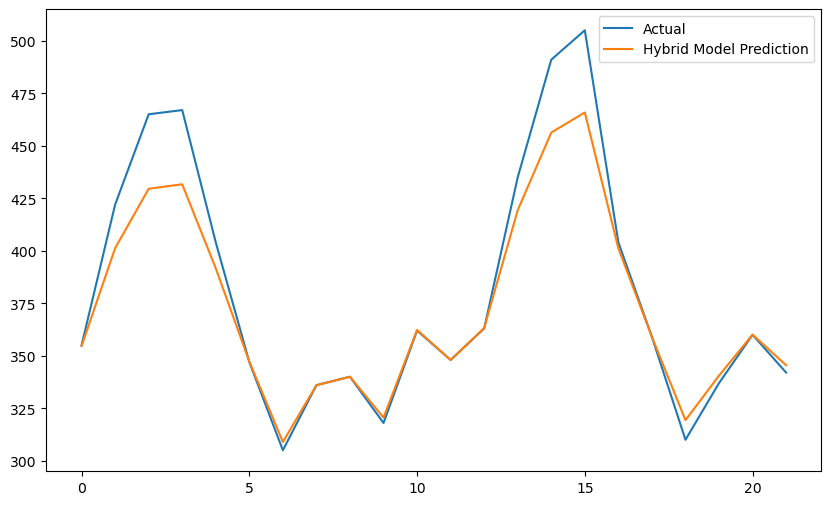

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_val, label='Actual')
plt.plot(final_val_predictions, label='Hybrid Model Prediction')
plt.legend()
plt.show()

Q 2) In a multiplicative hybrid model, the time series is first modelled using a linear model
(Linear Regression, Huber Regression or Linear SVR). Then the linear model forecasts
are divided from the time series data to obtain the residual series. The residual series is
considered nonlinear and modelled using a nonlinear model (LSTM, or GRU). Then
the final forecasts are obtained by multiplying the linear model forecasts with nonlinear
model forecasts. Write a program using this multiplicative hybrid model to forecast the
number of passengers travelling in an airline. Use 70-15-15 % ratios in train, validation
and test sets.

In [ ]:
# 1. Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict using the linear model
linear_train_pred = linear_model.predict(X_train)
linear_val_pred = linear_model.predict(X_val)
linear_test_pred = linear_model.predict(X_test)

In [ ]:
# Calculate the residuals (subtract linear predictions from actual data)
train_residuals = y_train - linear_train_pred
val_residuals = y_val - linear_val_pred

In [ ]:
# 2. Train the LSTM model on the residuals

# Normalize the residuals
mean_residual = np.mean(train_residuals)
std_residual = np.std(train_residuals)
train_residuals_normalized = (train_residuals - mean_residual) / std_residual

In [ ]:
# Reshape the data for LSTM (LSTM expects 3D input)
train_residuals_normalized = train_residuals_normalized.reshape((train_residuals_normalized.shape[0], 1, 1))

In [ ]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(Input(shape=(1, 1)))
lstm_model.add(LSTM(50, activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the LSTM model
lstm_model.fit(train_residuals_normalized, train_residuals, epochs=50, batch_size=4, verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 803.8514
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 999.0246
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 1193.4543
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 1102.4188
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 950.5724
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 936.9743
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 829.7319
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 614.4697
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 771.4881
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 705.1814
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 839.8203
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 916.3141
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 854.8028
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 752.9880
Epoch 15/50
25/25 ━━━━━━━━━

In [ ]:
# Make predictions on validation residuals
val_residuals_normalized = (val_residuals - mean_residual) / std_residual
val_residuals_normalized = val_residuals_normalized.reshape((val_residuals_normalized.shape[0], 1, 1))
lstm_val_pred = lstm_model.predict(val_residuals_normalized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [ ]:
# 3. Combine the predictions
final_val_predictions = linear_val_pred + lstm_val_pred.flatten()

In [ ]:
# Evaluate the performance
rmse = np.sqrt(mean_squared_error(y_val, final_val_predictions))
print(f'Validation RMSE: {rmse}')

Validation RMSE: 16.805672835429696


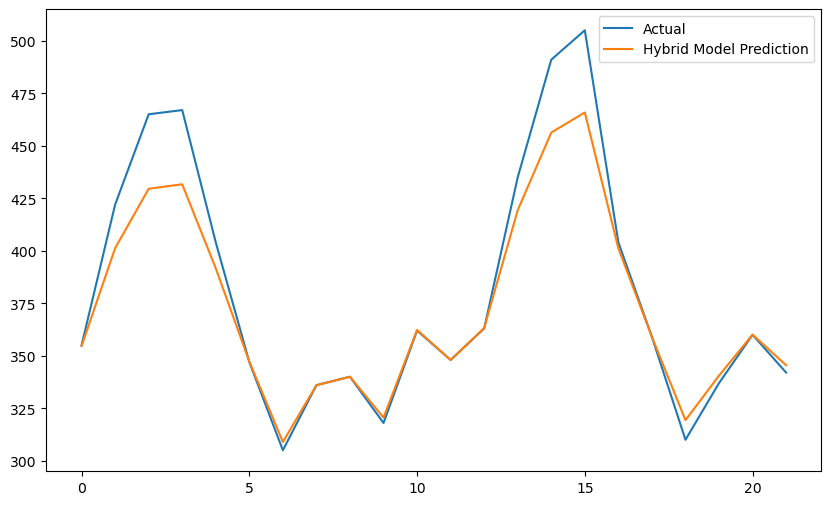

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_val, label='Actual')
plt.plot(final_val_predictions, label='Hybrid Model Prediction')
plt.legend()
plt.show()

Q 2) In a multiplicative hybrid model, the time series is first modelled using a linear model
(Linear Regression, Huber Regression or Linear SVR). Then the linear model forecasts
are divided from the time series data to obtain the residual series. The residual series is
considered nonlinear and modelled using a nonlinear model (LSTM, or GRU). Then
the final forecasts are obtained by multiplying the linear model forecasts with nonlinear
model forecasts. Write a program using this multiplicative hybrid model to forecast the
number of passengers travelling in an airline. Use 70-15-15 % ratios in train, validation
and test sets.